In [1]:
import pandas as pd
import numpy as np
from re import match
import matplotlib.pyplot as plt
import seaborn as sns
import re

#### Problem 1
- Import and explore the district-level fiscal data from 2015-16.
- Rank and visualize the states that take in the most federal funding (revenue).
- Which states spend the most federal funding per student?

In [2]:
district_fiscal = pd.read_csv("C:/Users/mouni/Downloads/DS5500/HW3/Sdf16_1a/Sdf16_1a.txt", sep='\t')
district_fiscal.head()

C:\Users\mouni\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2
0,100002,N,1,01073,142,13820,Alabama Youth Services,Alabama,AL,N,...,M,M,M,M,M,M,M,M,M,M
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,M,R,R,R,M,M,M,M,M


In [3]:
district_fiscal["TFEDREV"].head()

0         -1
1    7277000
2    7747000
3    6088000
4    5007000
Name: TFEDREV, dtype: int64

From the documentation "TFEDREV" represents total federal revenue. V33 is the original source for the student membership count. Remove negative values from "TFEDREV".

In [4]:
# Create a boolean variable.
district_fiscal["TFEDREV_bool"] = (district_fiscal["TFEDREV"] > 0)

In [5]:
district_fiscal = district_fiscal[district_fiscal.TFEDREV > 0]
district_fiscal.head()

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,...,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2,TFEDREV_bool
1,100005,01504840100000,1,01095,290,10700,Albertville City,Alabama,AL,03,...,M,R,R,R,M,M,M,M,M,True
2,100006,01504800100000,1,01095,290,10700,Marshall County,Alabama,AL,03,...,M,R,R,R,M,M,M,M,M,True
3,100007,01503740100000,1,01073,142,13820,Hoover City,Alabama,AL,03,...,M,R,R,R,M,M,M,M,M,True
4,100008,01504530100000,1,01089,290,26620,Madison City,Alabama,AL,03,...,M,R,R,R,M,M,M,M,M,True
6,100011,01503710100000,1,01073,142,13820,Leeds City,Alabama,AL,03,...,M,R,R,R,M,M,M,M,M,True


In [6]:
grouped_df = district_fiscal.groupby("STNAME")["TFEDREV"].sum().sort_values(ascending=False)

In [7]:
grouped_df.head(51)

STNAME
California              7709275000
Texas                   6194317000
New York                3374794000
Florida                 3147329000
Illinois                2334945000
Pennsylvania            2037315000
Ohio                    1837963000
Georgia                 1815242000
Michigan                1731034000
North Carolina          1587976000
Arizona                 1302010000
New Jersey              1249741000
Louisiana               1115619000
Washington              1098332000
Tennessee               1096182000
Virginia                1058146000
Indiana                 1015476000
Missouri                 959978000
Kentucky                 880296000
South Carolina           860867000
Maryland                 823599000
Massachusetts            804595000
Alabama                  803907000
Wisconsin                782647000
Colorado                 721719000
Oklahoma                 703225000
Mississippi              690724000
Minnesota                685055000
Arkansas     

Text(0.5, 1.0, 'The states that take in the most federal funding (revenue)')

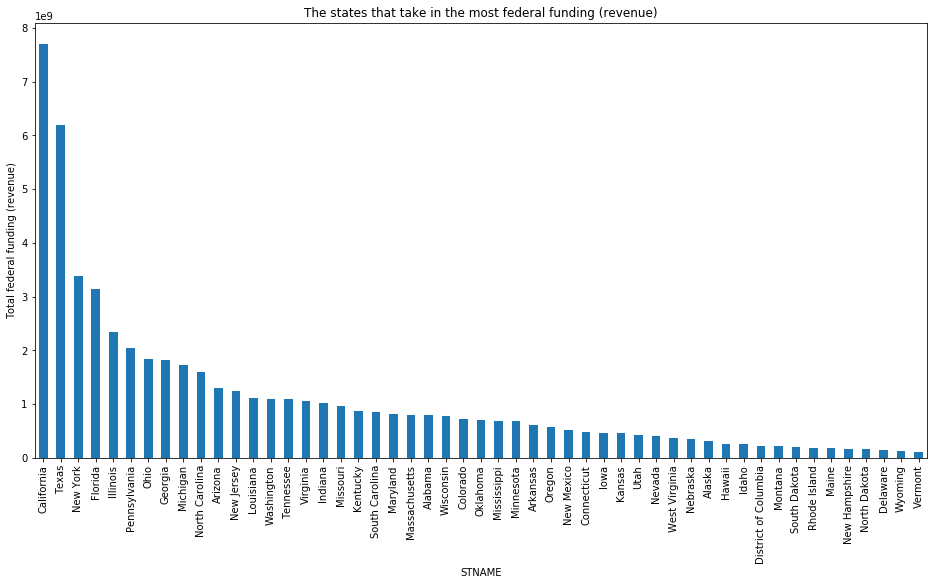

In [8]:
plt.figure(figsize=(16,8))
grouped_df.plot.bar()
plt.ylabel('Total federal funding (revenue)')
plt.title("The states that take in the most federal funding (revenue)")

In [9]:
grouped_df1 = district_fiscal[["STNAME", "TOTALEXP", "V33"]].groupby(['STNAME']).sum().reset_index()
grouped_df1["spent"] = round(grouped_df1['TOTALEXP'] / grouped_df1['V33'])

grouped_df1 = grouped_df1.sort_values(by="spent",ascending=False)

grouped_df1.head()

,STNAME,TOTALEXP,V33,spent
8,District of Columbia,2247392000,82962,27089.0
45,Vermont,1585076000,59806,26504.0
32,New York,68420942000,2591958,26397.0
30,New Jersey,30427686000,1407891,21612.0
50,Wyoming,2034229000,94511,21524.0


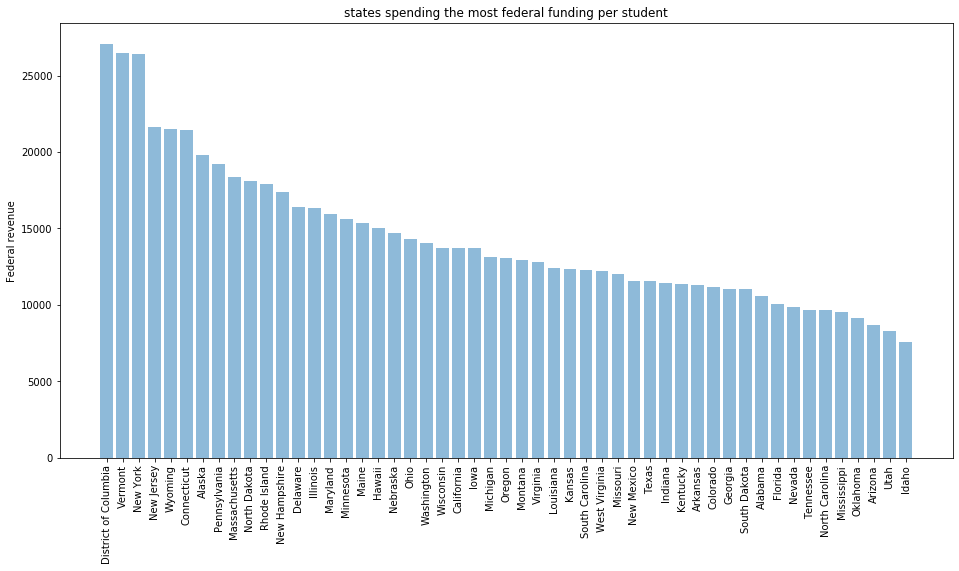

In [10]:
plt.figure(figsize=(16,8))
plt.bar(grouped_df1.STNAME, grouped_df1.spent, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Federal revenue')
plt.title('states spending the most federal funding per student')

plt.show()

- DC spends the most federal funding per student.
- Vermont and New york are at the same level of spending their federal funds per student.

#### Problem 2
- Visualize the relationship between school districts’ total revenue and expenditures.
- Which states have the most debt per student?

In [25]:
grouped_df2 = district_fiscal[["STNAME", "TOTALEXP", "TOTALREV", "V33", "TFEDREV"]].groupby(['STNAME']).sum().reset_index()
grouped_df2.head()

,STNAME,TOTALEXP,TOTALREV,V33,TFEDREV
0,Alabama,7864636000,7607098000,743789,803907000
1,Alaska,2623014000,2494691000,132477,307320000
2,Arizona,9346841000,9830650000,1078838,1302010000
3,Arkansas,5541889000,5513815000,491251,606946000
4,California,85206481000,89110947000,6203559,7709275000


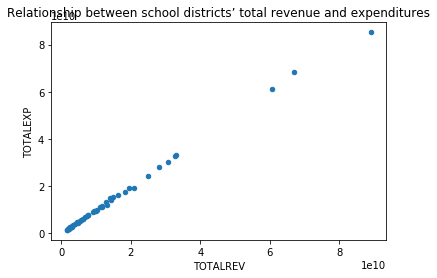

In [12]:
grouped_df2.plot(kind='scatter',x='TOTALREV',y='TOTALEXP',
                      title= "Relationship between school districts’ total revenue and expenditures")

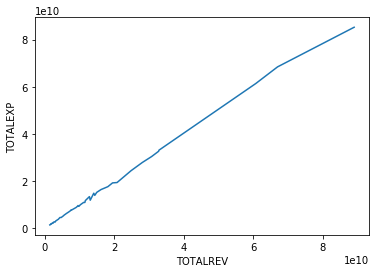

In [13]:
sns.lineplot(x="TOTALREV", y="TOTALEXP", data=grouped_df2)

In [14]:
grouped_df2["Debt_per_student"] = (grouped_df2["TOTALEXP"] - grouped_df2["TOTALREV"])/grouped_df2["V33"]
# print(grouped_df2.head())

# remove negative values

grouped_df2 = grouped_df2[grouped_df2.Debt_per_student > 0]
grouped_df2 = grouped_df2.sort_values(by="Debt_per_student",ascending=False)
grouped_df2.head()

,STNAME,TOTALEXP,TOTALREV,V33,TFEDREV,Debt_per_student
34,North Dakota,1962859000,1787486000,108285,155453000,1619.550261
8,District of Columbia,2247392000,2138284000,82962,226202000,1315.156337
1,Alaska,2623014000,2494691000,132477,307320000,968.643614
27,Nebraska,4640422000,4398811000,315520,346826000,765.754944
23,Minnesota,13464111000,12869206000,861784,685055000,690.317992


- North Dakota and DC has the highest debt per student.

#### Problem 3
- The district-level performance metrics from EDFacts may be useful in your decision.
- However, to protect student privacy, the data in these datasets has been heavily “blurred” to prevent students from being identified. Therefore, most of the numeric metrics are presented as ranges in string format. In addition, censored and missing data must be imputed.
- Write and explain a function for processing a single column of “blurred” metrics into usable numeric values.
- Use it to process and then visualize the distribution of a performance metric of your choice.

In [15]:
math_ach_data = pd.read_csv('C:/Users/mouni/Downloads/DS5500/HW3/math-achievement-sch-sy2015-16.csv', low_memory=False)
arts_ach_data = pd.read_csv('C:/Users/mouni/Downloads/DS5500/HW3/rla-achievement-sch-sy2015-16.csv', low_memory=False)

In [16]:
math_ach_data.head()

,STNAM,FIPST,LEAID,LEANM,NCESSCH,SCHNAM,DATE_CUR,ALL_MTH00NUMVALID_1516,ALL_MTH00PCTPROF_1516,MAM_MTH00NUMVALID_1516,...,MIG_MTH05NUMVALID_1516,MIG_MTH05PCTPROF_1516,MIG_MTH06NUMVALID_1516,MIG_MTH06PCTPROF_1516,MIG_MTH07NUMVALID_1516,MIG_MTH07PCTPROF_1516,MIG_MTH08NUMVALID_1516,MIG_MTH08PCTPROF_1516,MIG_MTHHSNUMVALID_1516,MIG_MTHHSPCTPROF_1516
0,ALABAMA,1,100005,Albertville City,10000500870,Ala Avenue Middle Sch,14APR17,707,36,2,...,NaN,NaN,NaN,NaN,19,21-39,20,LE20,NaN,NaN
1,ALABAMA,1,100005,Albertville City,10000500871,Albertville High Sch,14APR17,307,15,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,LT50
2,ALABAMA,1,100005,Albertville City,10000500879,Evans Elem Sch,14APR17,772,43,2,...,28,LE20,16,LE20,NaN,NaN,NaN,NaN,NaN,NaN
3,ALABAMA,1,100005,Albertville City,10000500889,Albertville Elem Sch,14APR17,852,55,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALABAMA,1,100006,Marshall County,10000600193,Kate Duncan Smith DAR Middle,14APR17,443,36,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ALL_MTH00PCTPROF_1516: percentage of students over the proficiency

It has values like GE80 meaning greater than or equal to 80, LT50 meaning less than 50, in the range of 65-69. PS, nan denoting missing values. We need to handle them by following techniques.
- GE80 or GT20 can be written as mean of 81 and 21 respectively.
- LE60 or LT30 can be written as mean of 59 and 29 respectively.
- range values like 65 - 85 which will be replaced by the mean of 65 and 85.

In [17]:
s = math_ach_data['ALL_MTH00PCTPROF_1516']

In [18]:
def processing(dframe, col):
    empty = []
#     column = column.astype(str)
    column = dframe[col]
    for x in column:
        if bool(re.search('-', x)):
            val1 = int(x.split('-')[0])
            val2 = int(x.split('-')[1])
            val = int((val1 + val2)/2)
        elif bool(re.search('PS', x)):
            val = np.nan
        elif bool(re.search(r"L.*", x)):
            v1 = int(x[2:])
            val = int((v1-1)/2)
        elif bool(re.search(r"G.*", x)):
            v2 = int(x[2:])
            val = int((v2+1)/2)        
        else:
            val = int(x)
        empty.append(val)
#     dframe[col+"processed"] = empty
#     return dframe
    return empty

In [19]:
ALL_MTH00PCTPROF_1516_processed = processing(math_ach_data, 'ALL_MTH00PCTPROF_1516')
# math_processed_data
unblurred = np.asarray(ALL_MTH00PCTPROF_1516_processed)
unblurred = pd.DataFrame(unblurred)
unblurred.head()

,0
0,36.0
1,15.0
2,43.0
3,55.0
4,36.0


Text(0.5, 1.0, 'Histogram of percentage students over the proficiency in math')

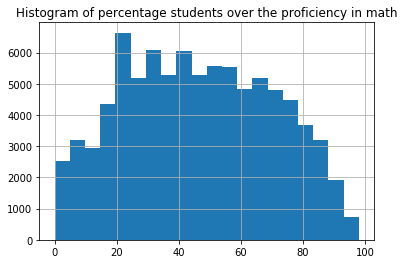

In [20]:
unblurred.hist(bins=20)
plt.title('Histogram of percentage students over the proficiency in math')

#### Problem 4
- You are tasked with cutting 15% of the U.S. federal budget currently being spent on funding school districts.
- How much money is this?
- Choose which school districts will have their funding cut and how this will be done. (You should produce a table of LEA IDs and the dollar amount by which their federal funding will be cut –you do not need print the entire table.)

In [43]:
Tot_fed_budget=district_fiscal['TFEDREV'].sum()
print("Total federal budget currently being spent onfunding school districts is $",Tot_fed_budget)

Total federal budget currently being spent onfunding school districts is $ 55602742000


In [44]:
cutting_budget_amt = Tot_fed_budget*0.15
print("15% of the U.S. federal budget in funding school districts is $",cutting_budget_amt)

15% of the U.S. federal budget in funding school districts is $ 8340411300.0


In [45]:
remaining = Tot_fed_budget - cutting_budget_amt
print("Remaining U.S. federal budget is $",remaining)

Remaining U.S. federal budget is $ 47262330700.0


In [64]:
data_q4 = district_fiscal[['NAME','STABBR','LEAID','TOTALEXP','TOTALREV','TFEDREV']].reset_index()

# If the difference is positive then the revenue is greater than the expenditure and those districts funding has to be cut down 
data_q4['difference']=data_q4['TOTALREV'] - data_q4['TOTALEXP']

In [65]:
data_q4.head()

,index,NAME,STABBR,LEAID,TOTALEXP,TOTALREV,TFEDREV,difference
0,1,Albertville City,AL,100005,46778000,49795000,7277000,3017000
1,2,Marshall County,AL,100006,64739000,56422000,7747000,-8317000
2,3,Hoover City,AL,100007,165436000,168040000,6088000,2604000
3,4,Madison City,AL,100008,101154000,105927000,5007000,4773000
4,6,Leeds City,AL,100011,32285000,27699000,1522000,-4586000


In [78]:
available_amount = data_q4['difference'].sum()

# The difference amount is the surplus amount left for each school district and it is added together so that is the 
# left out amount with is neither spent nor used by those school districts for that year.
available_amount

# 
print(" percentage of amount to be cut from the revenue is ",cutting_budget_amt/available_amount)


 percentage of amount to be cut from the revenue is  1.458130943142166


In [67]:
# data_q4["difference"] = (data_q4["difference"] > 0)

data_q4_cropped = data_q4[data_q4.difference > 0]

In [70]:
# the total revenue is greater than the total expenditure for these districts
data_q4_cropped.head(10)

,index,NAME,STABBR,LEAID,TOTALEXP,TOTALREV,TFEDREV,difference
0,1,Albertville City,AL,100005,46778000,49795000,7277000,3017000
2,3,Hoover City,AL,100007,165436000,168040000,6088000,2604000
3,4,Madison City,AL,100008,101154000,105927000,5007000,4773000
5,7,Boaz City,AL,100012,22413000,22813000,2457000,400000
7,21,Alexander City,AL,100030,29642000,32454000,3717000,2812000
8,36,Andalusia City,AL,100060,15978000,18650000,2360000,2672000
18,60,Pike Road,AL,100195,8943000,9473000,326000,530000
19,62,Auburn City,AL,100210,131695000,134959000,4440000,3264000
20,63,Autauga County,AL,100240,76672000,80867000,7447000,4195000
21,64,Baldwin County,AL,100270,299880000,338236000,23710000,38356000


In [79]:
data_q4_cropped['CUT'] = (1.45)*data_q4_cropped['difference']
data_q4_cropped[['LEAID','CUT']]

C:\Users\mouni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,LEAID,CUT
0,100005,4374650.0
2,100007,3775800.0
3,100008,6920850.0
5,100012,580000.0
7,100030,4077400.0
8,100060,3874400.0
18,100195,768500.0
19,100210,4732800.0
20,100240,6082750.0
21,100270,55616200.0


#### Problem 5
Provide a statement for your supervisor justifying your decisions on which school districts will lose funding

- The school districticts whose total expenditure is less than the total revenue will be loosing funds because, there are few schools whose expenditure is higher than the revenue. So, it is irrational to cut their funding. We can always check this difference between expenditure and revenue, if the differrence is minimal, that school district can be spared from losing its funds.